In [1]:
# 1️⃣ Import Library yang Diperlukan
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns  # Pastikan Anda sudah menginstall seaborn (pip install seaborn)

from tensorflow.keras.applications.efficientnet_v2 import preprocess_input
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# 2️⃣ Konfigurasi Dataset & Parameter
# Misal, menggunakan folder "val" untuk evaluasi. Jika Anda memiliki folder "test", ganti sesuai.
DATASET_PATH = r"D:\Skripsi\sc\dataset_split"  # Sesuaikan path dataset Anda
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
AUTOTUNE = tf.data.AUTOTUNE

In [3]:
# 3️⃣ Memuat Dataset Evaluasi (Disarankan shuffle=False untuk konsistensi urutan saat menghitung confusion matrix)
initial_dataset_eval = tf.keras.utils.image_dataset_from_directory(
    os.path.join(DATASET_PATH, "val"),
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="categorical",
    shuffle=False
)
class_names = initial_dataset_eval.class_names  # Simpan class_names ke variabel


Found 1302 files belonging to 31 classes.


In [4]:
# 4️⃣ Terapkan Preprocessing sesuai model (EfficientNetV2-S)
dataset_eval = initial_dataset_eval.map(
    lambda x, y: (preprocess_input(x), y),
    num_parallel_calls=AUTOTUNE
)
dataset_eval = dataset_eval.prefetch(AUTOTUNE)

In [5]:
# 5️⃣ Memuat Model yang telah Disimpan
model = tf.keras.models.load_model("D:\Skripsi\scv2\models\efficientnetv2_rempahindo.keras")
print("✅ Model berhasil dimuat.")

✅ Model berhasil dimuat.


In [6]:
# 6️⃣ Evaluasi Model pada Dataset Evaluasi
loss, accuracy = model.evaluate(dataset_eval)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy*100:.2f}%")

41/41 ━━━━━━━━━━━━━━━━━━━━ 103s 2s/step - accuracy: 0.9242 - loss: 0.3135
Test Loss: 0.4051
Test Accuracy: 89.86%


In [7]:
# 7️⃣ Mendapatkan Prediksi Model untuk Menghitung Metrik Lainnya
#   Karena dataset_eval adalah dataset batched, kita menggabungkan semua label dan prediksi
y_true = np.concatenate([y for x, y in dataset_eval], axis=0)
y_pred_prob = model.predict(dataset_eval)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_true, axis=1)

41/41 ━━━━━━━━━━━━━━━━━━━━ 162s 4s/step


In [8]:
# 8️⃣ Menampilkan Classification Report
report = classification_report(y_true, y_pred, digits=4)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0     0.5846    0.9048    0.7103        42
           1     0.9268    0.9048    0.9157        42
           2     0.9545    1.0000    0.9767        42
           3     1.0000    0.9762    0.9880        42
           4     0.9333    1.0000    0.9655        42
           5     0.9318    0.9762    0.9535        42
           6     0.6379    0.8810    0.7400        42
           7     0.9762    0.9762    0.9762        42
           8     0.9545    1.0000    0.9767        42
           9     1.0000    0.8810    0.9367        42
          10     0.8163    0.9524    0.8791        42
          11     0.8636    0.9048    0.8837        42
          12     0.8864    0.9286    0.9070        42
          13     0.9459    0.8333    0.8861        42
          14     0.9070    0.9286    0.9176        42
          15     0.8929    0.5952    0.7143        42
          16     0.8571    0.8571    0.8571        42
   

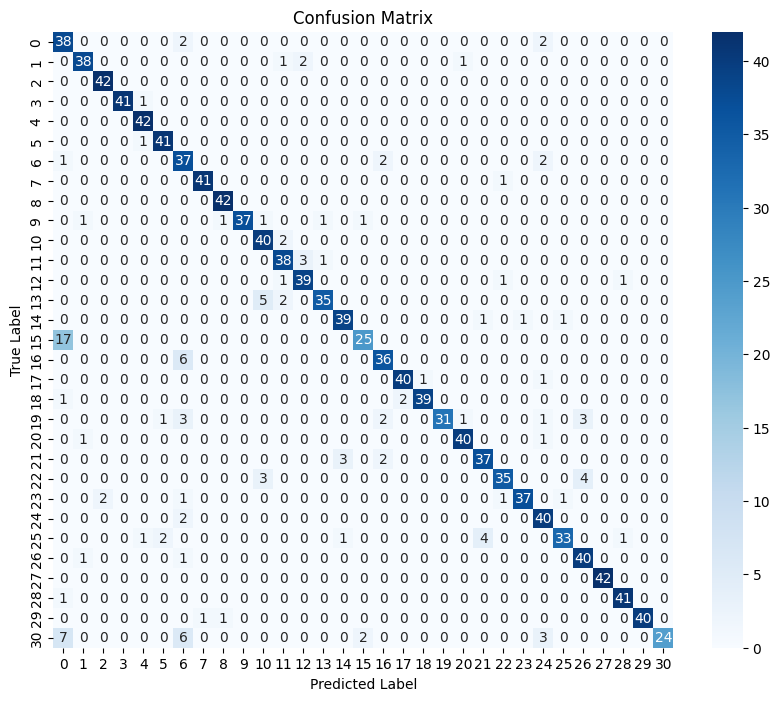

In [9]:
# 9️⃣ Menampilkan Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

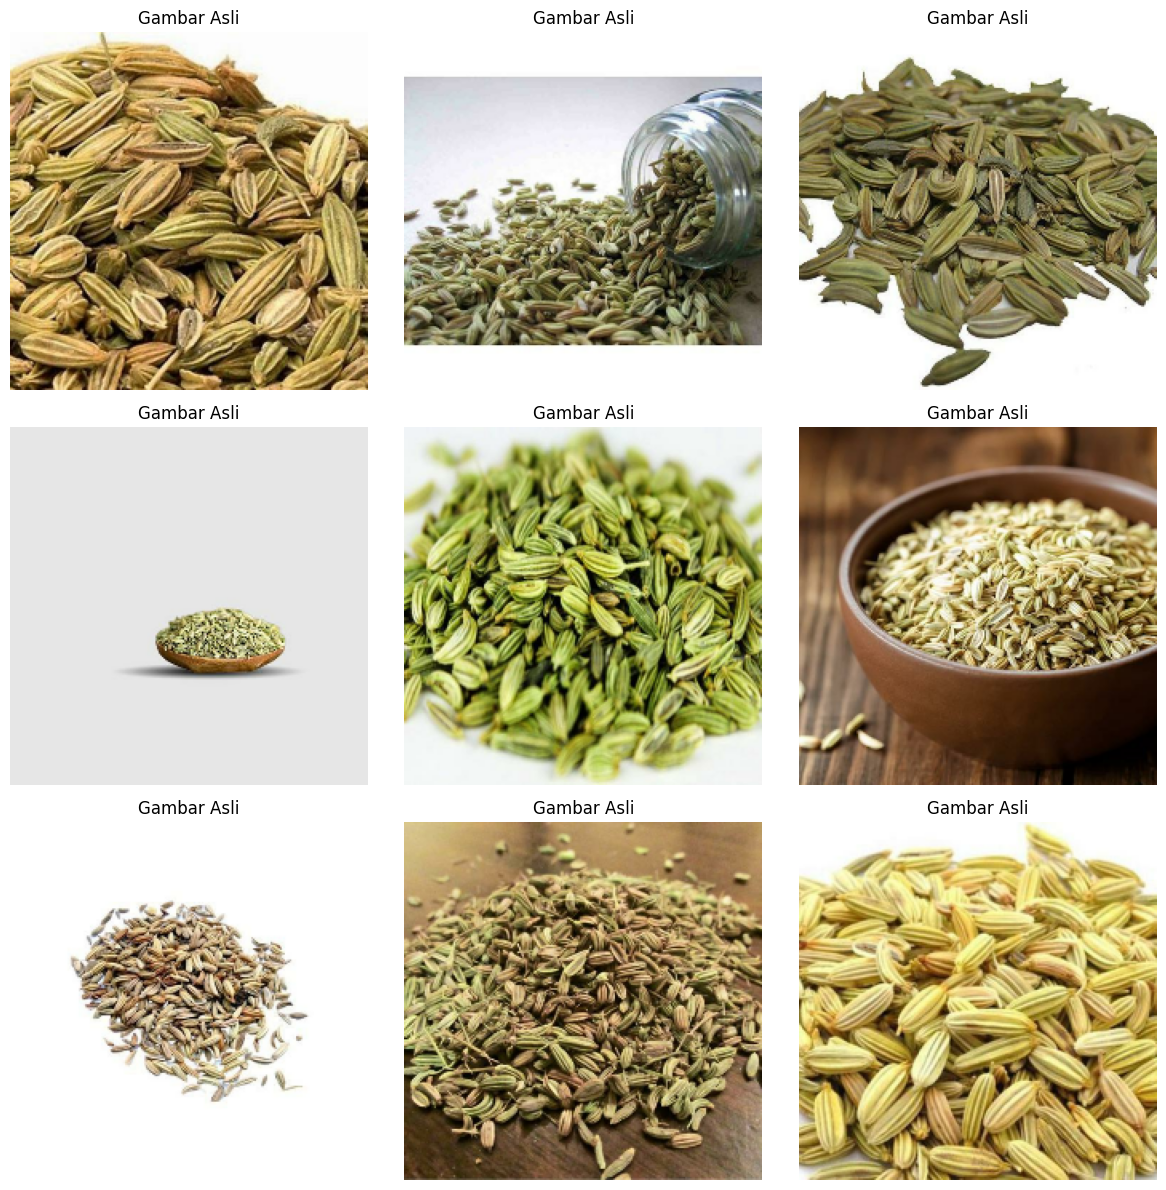

1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step


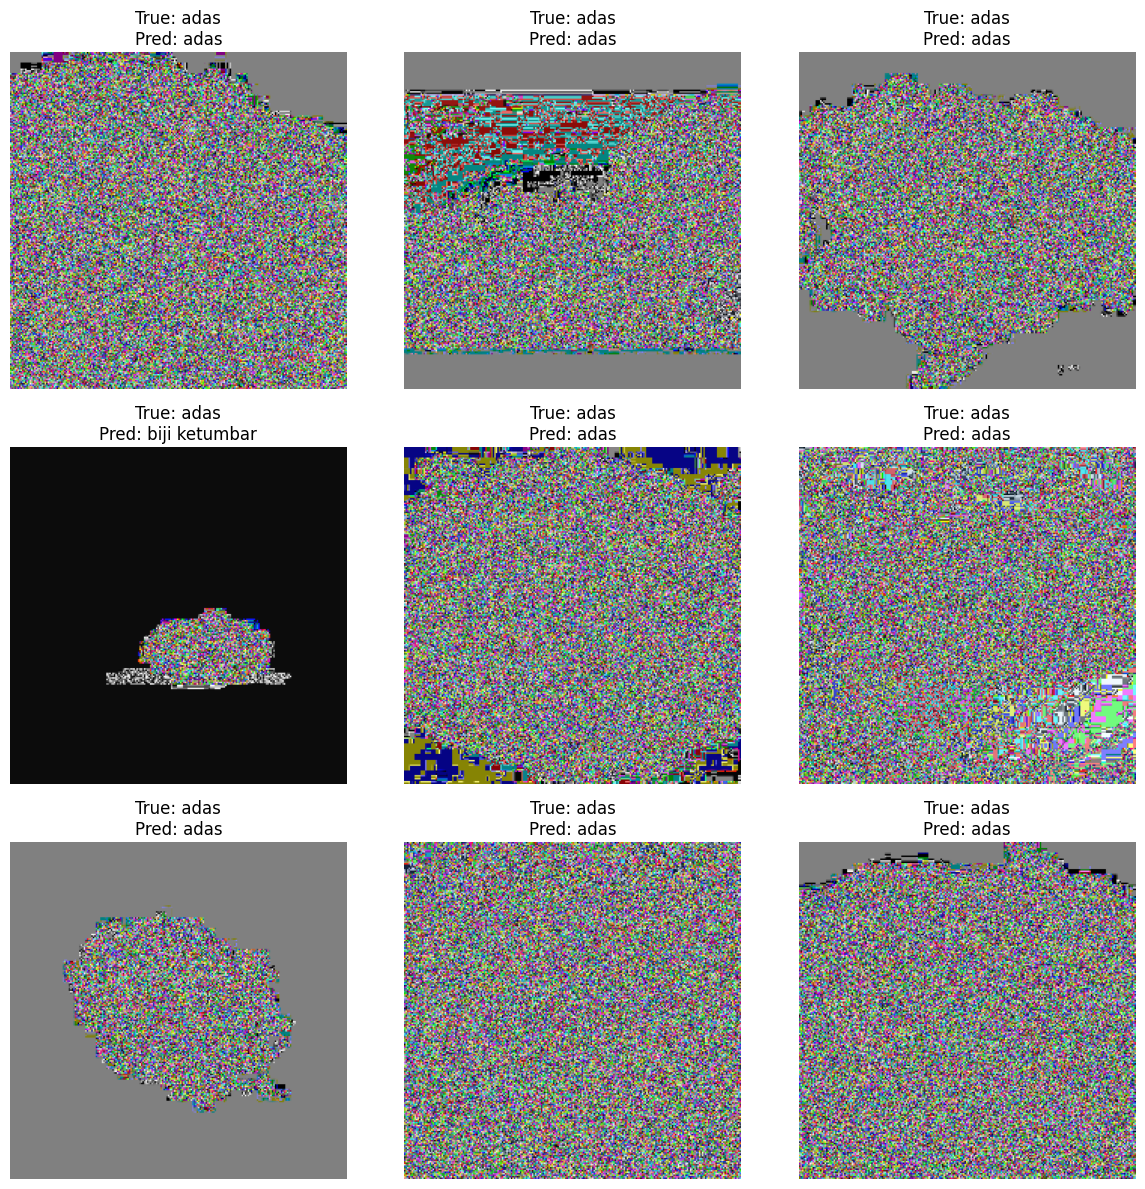

In [10]:
# 10️⃣ (Opsional) Visualisasi Contoh Prediksi
# Menampilkan beberapa gambar beserta label prediksi dan sesungguhnya
plt.figure(figsize=(12, 12))
for images, _ in dataset_eval.take(1):
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title("Gambar Asli")
        plt.axis("off")
plt.tight_layout()
plt.show()

# Tampilkan gambar setelah preprocess_input dan inverse normalization
plt.figure(figsize=(12, 12))
for images, labels in dataset_eval.take(1):
    preds = model.predict(images)
    preds = np.argmax(preds, axis=1)
    true_labels = np.argmax(labels.numpy(), axis=1)
    
    for i in range(9):
        plt.subplot(3, 3, i+1)
        # Konversi gambar dari [-1, 1] ke [0, 255]
        img = ((images[i].numpy() + 1) / 2) * 255
        plt.imshow(img.astype("uint8"))
        plt.title(f"True: {class_names[true_labels[i]]}\nPred: {class_names[preds[i]]}")
        plt.axis("off")
plt.tight_layout()
plt.show()

